# DFT mit Fensterung 
In diesem Notebook wird gezeigt, wie man mit Fensterfunktionen bei der DFT arbeitet.

In [1]:
from __future__ import print_function, division
import os, sys
module_path = os.path.abspath(os.path.join('../..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)
import dsp_fpga_lib as dsp # import and set plot properties
    
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import linspace, log10, cos, sin, pi
from numpy.fft import fft, fftshift, fftfreq

import scipy.signal as sig
#import scipy.interpolate as intp

plt.rcParams["figure.figsize"] = [9, 4]

ImportError: No module named 'dsp_fpga_lib'

Zunächst werden Abtastfrequenz und die Zahl der FFT-Punkte festgelegt. Daraus ergibt sich automatisch die Länge des Messfensters $T_{mess} = T_S N_{FFT}$ und die Frequenzauflösung $\Delta f = f_S / N_{FFT} = 1 / T_{mess}$:

In [20]:
f_S = 1e4 # sample frequency 
T_S = 1./f_S 
N_FFT = 512 
T_mess = T_S * N_FFT
Delta_f = f_S / N_FFT

print('T_mess\t=', T_mess, 's')
print('Delta f\t=', Delta_f, 'Hz')

T_mess	= 0.0512 s
Delta f	= 19.53125 Hz


Um die Frequenz- und Amplitudenauflösung verschiedener Szenarien zu vergleichen, erzeugen wir uns ein Testsignal mit zwei Tönen unterschiedlicher Frequenz $f_a$, $f_b$ und Amplitude $A_a$, $A_b$ und überlagertem weißem gaußschem Rauschen (AWGN) mit der Standardabweichung $\sigma$:

f_a =  976.5625 Hz
f_b =  1025.390625 Hz


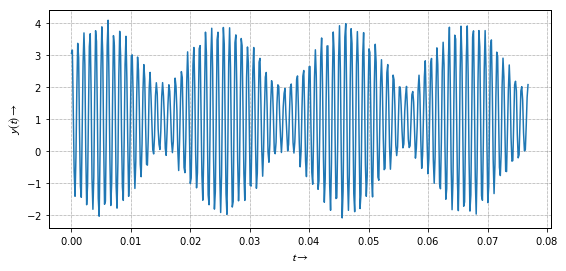

In [21]:
A_a = 2; f_a = Delta_f * 50 # Ton a, genau auf Auswertefrequenz
A_b = 1; f_b = Delta_f * 52.5  # Ton b, zwischen Auswertefrequenzen
DC = 1.
sigma = 0.1 # Standardabweichung des AWGN
fmin = 0.00  # untere Frequenz und
fmax = 120.0 # obere Frequenz für Spektrumsplots
t = linspace(0, T_mess*1.5, N_FFT) # Start / Stop / Anzahl
y = DC + A_a * cos(2 * pi * t * f_a) + A_b * sin(2 * pi * t * f_b) + sigma * np.random.randn(N_FFT) # y[n]
print('f_a = ', f_a, 'Hz')
print('f_b = ', f_b, 'Hz')
plt.plot(t,y);
plt.xlabel(r'$t \rightarrow $');plt.ylabel(r'$y(t) \rightarrow $');

Zur Spektralanalyse wird die DFT der Zeitfunktion berechnet. In Python (und den meisten anderen Programmiersprachen für Scientific Computing) wird die DFT über den kompletten Bereich $0 \ldots f_S$ berechnet. Bei reellwertigen Zeitsignalen sind aber die Teilspektren zwischen $0 \ldots f_S /2 $ und zwischen $f_S/2 \ldots f_S$ symmetrisch zueinander, man beschränkt sich daher in der Darstellung meist auf den Bereich $0 \ldots f_S /2 $. Damit trotzdem die Gesamtleistung auch im Frequenzbereich korrekt dargestellt wird (Parcevalsche Beziehung), wird das Spektrum (außer bei $f = 0$) mit dem Faktor 2 skaliert. 

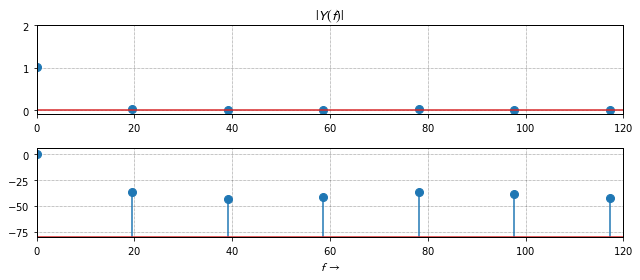

In [24]:
# calculate DFT at f = [0 ... f_S[ = [0... f_S/2[, [-f_S/2 ... 0[ :
Sy = 2 * np.abs(fft(y, N_FFT)) / N_FFT # skaliere für einseitiges Spektrum
Sy[0] = Sy[0] / 2 # korrigiere DC-Wert
f = fftfreq(N_FFT, T_S) 
# freq. points at [0... f_S/2[, [-f_S/2 ..
fig2 = plt.figure()
ax21 = fig2.add_subplot(2,1,1)
ax21.stem(f, abs(Sy)) 
ax21.set_xlim(fmin, fmax); ax21.set_ylim(-0.1, max(A_a, A_b))
ax22 = fig2.add_subplot(2,1,2); ax22.stem(f, 20*log10(abs(Sy)), bottom = -80) 
ax22.set_xlim(fmin, fmax); ax22.set_ylim(-80, max(20*log10(A_a), 20*log10(A_b)))
ax22.set_xlabel(r'$f \; \rightarrow$'); ax21.set_title(r'$|Y(f)|$');
fig2.tight_layout();

Wir berechnen die DFT aus $N_{FFT}$ Datenpunkten und erhalten $N_{FFT}$ Frequenzpunkte. **Wenn** wir uns ein zeitdiskretes, unendlich ausgedehntes Signal $y[n]$ vorstellen, bei dem sich diese $N_{FFT}$ Datenpunkte periodisch wiederholen, liefert die **DTFT** exakt das gleiche Ergebnis wie die DFT. Das entspricht der Multiplikation des Zeitsignals $y(t)$ mit einem Rechteckfenster der Länge $T_{mess}$ oder der Au

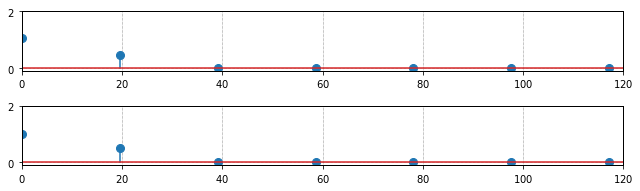

In [26]:
fig3 = plt.figure(3)
ax31 = fig3.add_subplot(3,1,2)
w = sig.windows.hamming(len(t))
X = fft(y * w, N_FFT) / N_FFT
ax31.stem(f, 2 * abs(X))
ax31.set_xlim(fmin, fmax); ax31.set_ylim(-0.1, max(A_a, A_b))
w = sig.windows.hann(len(t))
X = fft(y*w,N_FFT)/N_FFT
ax33 = fig3.add_subplot(3,1,3)
ax33.stem(f, 2 * abs(X))
ax33.set_xlim(fmin, fmax); ax33.set_ylim(-0.1, max(A_a, A_b))
fig3.tight_layout();

***
**Copyright**

(c) 2016 - 2018 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2018*.